In [8]:
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 30)
%matplotlib inline

In [11]:
df = pd.read_csv('tmdb-movies-cleaned.csv')
dfProfit = pd.read_csv('tmdb-movies-profit-cleaned.csv')

In [12]:
df

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
6,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08
7,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
8,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09
9,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08


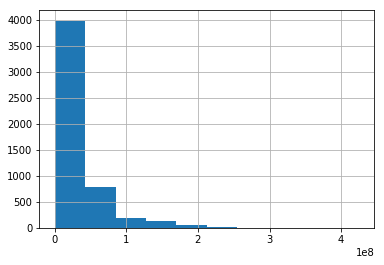

In [5]:
dfProfit.budget.hist()

In [6]:
df[df.budget > 0].budget.count()

5150

In [7]:
df[(df.budget >0) & (df.budget<1000000)].budget.count()

#5696 - budgent = 0
# 364 - budget = 0 - 1M
#4722 - budget over 1M

357

In [ ]:
df[(df.budget > 100) & (df.budget < 1000000)].budget.hist(bins=100, figsize=(20,7))

In [ ]:
df[df['budget'] > 1000000].budget.hist(bins=100, figsize=(20,7))

In [ ]:
df.vote_average.hist()

In [ ]:
df[df.vote_count > 300].sort_values(by='vote_average', ascending=False).head(10)

In [ ]:
df.vote_count.hist(bins=100, figsize=(20,7))
# minimum 10 votes

In [ ]:
df[df.runtime == 2].runtime.hist(bins=100)

In [ ]:
df[(df.popularity > 1) & (df.popularity < 10)].popularity.hist(bins=100)

In [ ]:
unique_release_years = df.release_year.unique()
print("Videos released between %s and %s " % (unique_release_years.min(), unique_release_years.max()))

In [ ]:
#get distinct genres

dfGenres=df['genres'].str.split(SEP, expand=True, n=4)

uniqueValues=np.zeros((0))
for c in dfGenres.columns:
    uniqueValues = np.concatenate((uniqueValues, dfGenres[~dfGenres[c].isnull()][c].unique()), axis=0)

uniqueValues = np.unique(uniqueValues)
uniqueValues

In [ ]:
def split_compound_column(inputDf, column, prefix, separator='|'):
    # split column by separator
    dfColSplit = inputDf[column].str.split(separator, expand=True, n=4)
    maxCastSplit = dfColSplit.shape[1]
        
    # rename new columns
    renameCastCols = {}
    for i in range(0,maxCastSplit):
        renameCastCols[i] = prefix + '_' + str(i)
    dfColSplit.rename(columns=renameCastCols, inplace=True)
    
    # if needed a concatination can be done
#     dfCompound = pd.concat([inputDf,dfColSplit], axis=1, sort=False)
#     dfCompound.drop([column], axis=1, inplace=True)

    return dfColSplit

In [ ]:
dfGenreYearly = pd.DataFrame([], columns = uniqueValues) 
dfGenreYearly = pd.concat((df[['release_year']],dfGenreYearly))

dfGenreYearly.fillna(0, inplace=True)

for index,row in dfGenres.iterrows():
    for i in range(0,5):
        if row[i] is not None:
            dfGenreYearly.loc[index, [row[i]]] += dfPopularity.loc[index,'popularity']

In [ ]:
dfGenreYearlyGrouped = dfGenreYearly.groupby(['release_year'])
dfGenreYearlyGrouped.sum().plot(figsize=(20,10));

In [ ]:
dfGenreYearlyGrouped.max(axis=1).max(axis=1)

### Question 4 -  What kinds of properties are associated with movies that have high revenues?

I am selecting movies with revenues above 90% compared to the other

In [ ]:
higlyProfitableFilter = dfProfit.revenue_adj > dfProfit.revenue_adj.quantile(q=0.90)

In [ ]:
includePairs = ['revenue_adj', 'popularity', 'budget_adj', 'release_year', 'runtime', 'vote_count', 'vote_average']
g = sns.pairplot(dfProfit[higlyProfitableFilter][includePairs]) # , hue='highly_profitable'

I don't find any clear correlation between the properties and the revenue

In [ ]:
### Question 2 - Which genres are most popular from year to year?

In [ ]:
def process_genres(x):
    genre_list = x.str.cat(sep="|").split("|")
    
    genre_counts = dict((i, genre_list.count(i)) for i in genre_list)
    
    return list(sorted(genre_counts.items(), key=lambda kv: kv[1], reverse=True)[:2])


genres = df.groupby('release_year').genres.agg([('popular_genre', process_genres)])
x = genres['popular_genre'].apply(pd.Series).reset_index().melt(id_vars='release_year').sort_values(by='release_year')
# x.plot(x='release_year', y = 'value')

x[['g', 'v']] = pd.DataFrame(x.value.tolist(), columns=['g', 'v'], index=x.index)
z = x[['release_year', 'g', 'v']].set_index('release_year')
z.plot.bar(stacked=True, figsize=(20,10))
# x.groupby(['release_year']).plot.bar(x='release_year', y='v', stacked=True);


# top_genres = pd.DataFrame(genres['popular_genre'].tolist(), columns=['genre', 'count'], index=genres['popular_genre'].index)
# top_genres
# top_genres.plot(kind='bar', stacked=True)
#top_genres.groupby(0).sum().sum().sum()